### 1. Import and data loading

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
df = pd.read_csv("../data/chess_games_clean.csv")
df.head()

,Event,Date,White,Black,Result,ECO,WhiteElo,BlackElo,Termination,Moves,EventType
0,Rated Blitz game,2024.01.01,Peixeiro,VaRYemezAmca72,1-0,A14,2504,2371,Time forfeit,c4 c6 g3 d5 Nf3 Nf6 Bg2 e6 b3 Be7 Bb2 O-O O-O ...,blitz
1,Rated Blitz game,2024.01.01,bayad2016,Yoda-wins,1/2-1/2,E01,2487,2596,Normal,d4 d5 c4 e6 g3 Nf6 Bg2 Bb4+ Nd2 O-O Nf3 dxc4 O...,blitz
2,Rated Blitz game,2024.01.01,FantacticEman,why_this_bot_exists,1/2-1/2,D35,2915,2921,Normal,d4 d5 c4 e6 Nc3 Nf6 cxd5 exd5 Bg5 c6 e3 h6 Bh4...,blitz
3,Rated Blitz game,2024.01.01,Chigorinez,Luhrman,1-0,B40,2542,2433,Normal,e4 c5 d4 cxd4 Nf3 e6 Nxd4 Bc5 Nc3 Ne7 Be3 a6 N...,blitz
4,Rated Blitz game,2024.01.01,syad_bony77,GERINDRA_BOS,0-1,C48,2473,2658,Normal,e4 e5 Nf3 Nf6 Nc3 Nc6 Bb5 Nd4 Nxd4 exd4 Nd5 c6...,blitz


### 2. Dataset Overview

In [3]:
print(f"Total games: {len(df):,}")
print(f"Total features: {df.shape[1]}")
print(f"\nDate range: {df['Date'].min()} to {df['Date'].max()}")
print(f"Unique players (White): {df['White'].nunique():,}")
print(f"Unique players (Black): {df['Black'].nunique():,}")
print(f"Unique ECO codes: {df['ECO'].nunique()}")

Total games: 3,268,698
Total features: 11

Date range: 2024.01.01 to 2024.12.31
Unique players (White): 52,138
Unique players (Black): 52,001
Unique ECO codes: 497


In [4]:
# Check data types and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3268698 entries, 0 to 3268697
Data columns (total 11 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   Event        object
 1   Date         object
 2   White        object
 3   Black        object
 4   Result       object
 5   ECO          object
 6   WhiteElo     int64 
 7   BlackElo     int64 
 8   Termination  object
 9   Moves        object
 10  EventType    object
dtypes: int64(2), object(9)
memory usage: 274.3+ MB


In [5]:
# Basic summary statistics
df.describe()

,WhiteElo,BlackElo
count,3.268698e+06,3.268698e+06
mean,2.569315e+03,2.568941e+03
std,1.342634e+02,1.328270e+02
min,2.300000e+03,2.300000e+03
25%,2.500000e+03,2.500000e+03
50%,2.545000e+03,2.545000e+03
75%,2.620000e+03,2.620000e+03
max,3.367000e+03,3.390000e+03


In [6]:
for color in ["WhiteElo", "BlackElo"]:
    s = df[color].describe()
    print(
        f"{color}: mean={s['mean']:.1f}, std={s['std']:.1f}, "
        f"min={s['min']:.0f}, Q1={s['25%']:.0f}, median={s['50%']:.0f}, "
        f"Q3={s['75%']:.0f}, max={s['max']:.0f}"
    )

WhiteElo: mean=2569.3, std=134.3, min=2300, Q1=2500, median=2545, Q3=2620, max=3367
BlackElo: mean=2568.9, std=132.8, min=2300, Q1=2500, median=2545, Q3=2620, max=3390


### 3. Descriptive Statistics (EDA)

In [7]:
df['Result'] = df['Result'].astype('category')

# Game length in half-moves from Moves string
def count_half_moves(moves_str):
    if pd.isna(moves_str):
        return np.nan
    return len(str(moves_str).split())

df['GameLength'] = df['Moves'].apply(count_half_moves)

# Rating difference (White - Black)
df['RatingDiff'] = df['WhiteElo'] - df['BlackElo']

df[['Result', 'GameLength', 'RatingDiff']].head()

,Result,GameLength,RatingDiff
0,1-0,49.0,133
1,1/2-1/2,71.0,-109
2,1/2-1/2,59.0,-6
3,1-0,71.0,109
4,0-1,56.0,-185


#### 3.1 Game outcome distributions

In [8]:
# Count and proportions of each outcome
counts = df['Result'].value_counts()
outcome_props = df['Result'].value_counts(normalize=True)
print("Game outcomes")
print(counts)
print("\nProportions")
print(outcome_props)

Game outcomes
Result
1-0        1508105
0-1        1338941
1/2-1/2     421652
Name: count, dtype: int64

Proportions
Result
1-0        0.461378
0-1        0.409625
1/2-1/2    0.128997
Name: proportion, dtype: float64


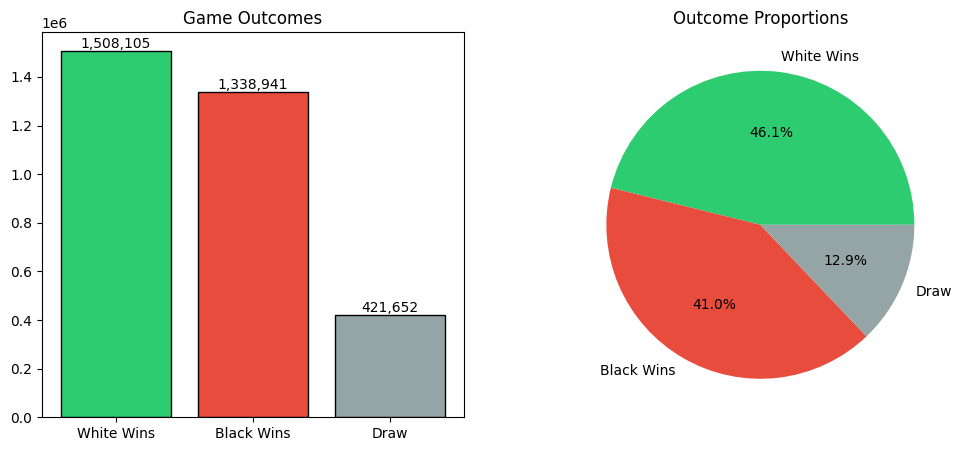

In [9]:
# Count results
labels = ["White Wins", "Black Wins", "Draw"]
colors = ["#2ecc71", "#e74c3c", "#95a5a6"]

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Bar chart
axes[0].bar(labels, counts.values, color=colors, edgecolor="black")
axes[0].set_title("Game Outcomes")
for i, v in enumerate(counts.values):
    axes[0].text(i, v, f"{v:,}", ha="center", va="bottom")

# Pie chart
axes[1].pie(counts.values, labels=labels, autopct="%1.1f%%", colors=colors)
axes[1].set_title("Outcome Proportions")

plt.show()


#### 3.2 Event Types

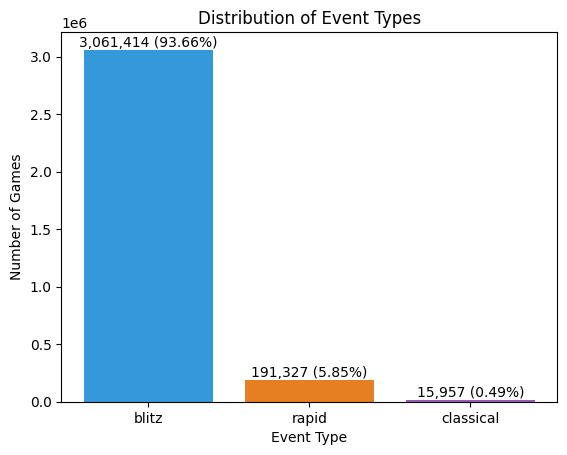

In [10]:
event_counts = df["EventType"].value_counts()

# Visualization
bars = plt.bar(
    event_counts.index, event_counts.values, color=["#3498db", "#e67e22", "#9b59b6"]
)

plt.xlabel("Event Type")
plt.ylabel("Number of Games")
plt.title("Distribution of Event Types")

# Add number above each bar
for bar in bars:
    event = bar.get_x() + bar.get_width() / 2
    height = bar.get_height()
    pct = (height / event_counts.sum()) * 100
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f"{int(height):,} ({pct:.2f}%)",
        ha="center",
        va="bottom",
    )

plt.show()

#### 3.3 Game Length Distributions


Move count statistics:
  Mean: 87.5 half-moves
  Median: 81 half-moves
  Min: 1.0
  Max: 601.0

Games by move count:
  ≤20 moves (opening):    27,365 (  0.8%)
  21-40 moves (early):   227,556 (  7.0%)
  41-60 moves (mid):     612,488 ( 18.7%)
  61-80 moves (late):    747,626 ( 22.9%)
  81+ moves (endgame):  1,652,989 ( 50.6%)
  81-100 moves:         604,911 ( 18.5%)
  101-150 moves:        847,138 ( 25.9%)
  151-200 moves:        157,958 ( 4.83%)
  >200 moves:            42,982 (1.315%)


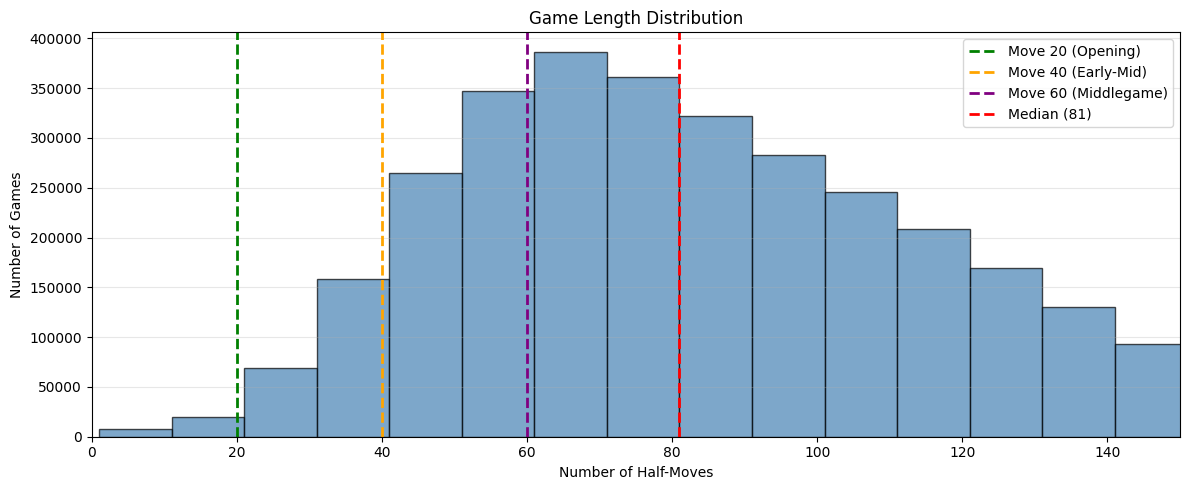

In [11]:
print("\nMove count statistics:")
print(f"  Mean: {df['GameLength'].mean():.1f} half-moves")
print(f"  Median: {df['GameLength'].median():.0f} half-moves")
print(f"  Min: {df['GameLength'].min()}")
print(f"  Max: {df['GameLength'].max()}")

print("\nGames by move count:")
print(
    f"  ≤20 moves (opening):  {(df['GameLength'] <= 20).sum():>8,} "
    f"({(df['GameLength'] <= 20).mean() * 100:>5.1f}%)"
)
print(
    f"  21-40 moves (early):  {((df['GameLength'] > 20) & (df['GameLength'] <= 40)).sum():>8,} "
    f"({((df['GameLength'] > 20) & (df['GameLength'] <= 40)).mean() * 100:>5.1f}%)"
)
print(
    f"  41-60 moves (mid):    {((df['GameLength'] > 40) & (df['GameLength'] <= 60)).sum():>8,} "
    f"({((df['GameLength'] > 40) & (df['GameLength'] <= 60)).mean() * 100:>5.1f}%)"
)
print(
    f"  61-80 moves (late):   {((df['GameLength'] > 60) & (df['GameLength'] <= 80)).sum():>8,} "
    f"({((df['GameLength'] > 60) & (df['GameLength'] <= 80)).mean() * 100:>5.1f}%)"
)
print(
    f"  81+ moves (endgame):  {(df['GameLength'] > 80).sum():>8,} "
    f"({(df['GameLength'] > 80).mean() * 100:>5.1f}%)"
)
print(
    f"  81-100 moves:        {((df['GameLength'] > 80) & (df['GameLength'] <= 100)).sum():>8,} "
    f"({((df['GameLength'] > 80) & (df['GameLength'] <= 100)).mean() * 100:>5.1f}%)"
)
print(
    f"  101-150 moves:       {((df['GameLength'] > 100) & (df['GameLength'] <= 150)).sum():>8,} "
    f"({((df['GameLength'] > 100) & (df['GameLength'] <= 150)).mean() * 100:>5.1f}%)"
)
print(
    f"  151-200 moves:       {((df['GameLength'] > 150) & (df['GameLength'] <= 200)).sum():>8,} "
    f"({((df['GameLength'] > 150) & (df['GameLength'] <= 200)).mean() * 100:>5.2f}%)"
)
print(
    f"  >200 moves:          {(df['GameLength'] > 200).sum():>8,} "
    f"({(df['GameLength'] > 200).mean() * 100:>5.3f}%)"
)
plt.figure(figsize=(12, 5))
plt.hist(df["GameLength"], bins=60, color="steelblue", edgecolor="black", alpha=0.7)
plt.axvline(20, color="green", linestyle="--", linewidth=2, label="Move 20 (Opening)")
plt.axvline(40, color="orange", linestyle="--", linewidth=2, label="Move 40 (Early-Mid)")
plt.axvline(60, color="purple", linestyle="--", linewidth=2, label="Move 60 (Middlegame)")
plt.axvline(
    df["GameLength"].median(),
    color="red",
    linestyle="--",
    linewidth=2,
    label=f"Median ({df['GameLength'].median():.0f})",
)
plt.xlabel("Number of Half-Moves")
plt.ylabel("Number of Games")
plt.title("Game Length Distribution")
plt.legend()
plt.grid(axis="y", alpha=0.3)
plt.xlim(0, 150)
plt.tight_layout()
plt.show()


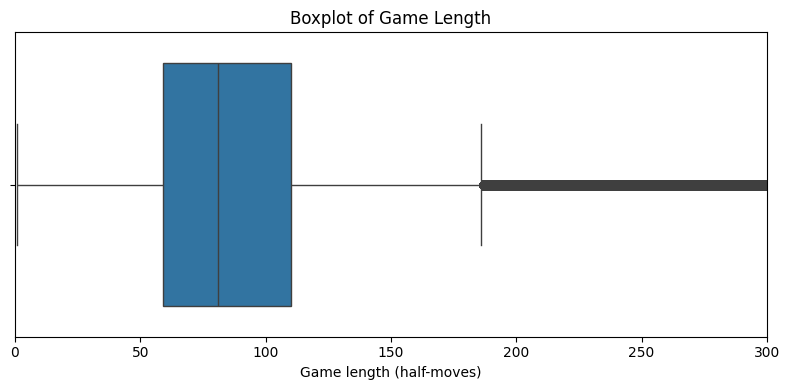

In [12]:
plt.figure(figsize=(8, 4))
sns.boxplot(x=df["GameLength"])
plt.xlabel("Game length (half-moves)")
plt.title("Boxplot of Game Length")
plt.xlim(0, 300)
plt.tight_layout()
plt.show()

#### 3.4 Rating difference vs Outcome

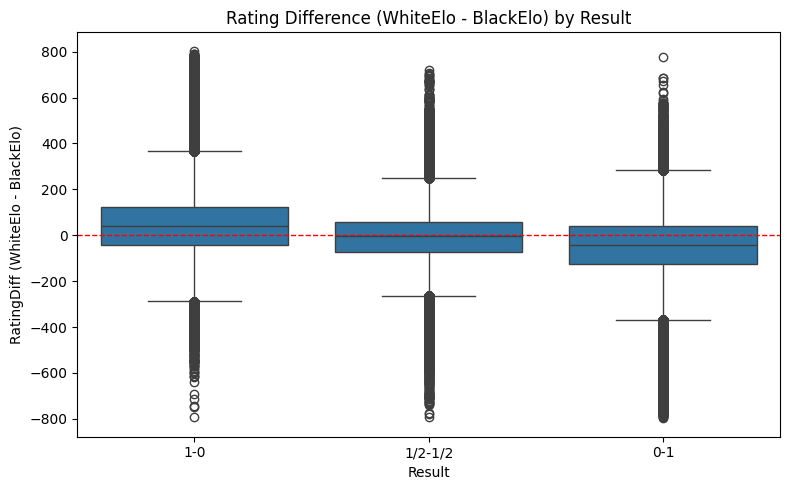

In [13]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='Result', y='RatingDiff', order=['1-0','1/2-1/2','0-1'])
plt.axhline(0, color='red', linestyle='--', linewidth=1)
plt.title("Rating Difference (WhiteElo - BlackElo) by Result")
plt.xlabel("Result")
plt.ylabel("RatingDiff (WhiteElo - BlackElo)")
plt.tight_layout()
plt.show()

In [14]:
# Group summaries
group_stats = df.groupby('Result', observed=False)['RatingDiff'].agg(['mean','median','std'])
group_stats

,mean,median,std
Result,,,
0-1,-41.705794,-42.0,119.273552
1-0,39.856344,39.0,120.800262
1/2-1/2,-7.215047,-4.0,111.515623


#### 3.5 Outcome by Rating Gap Bins

In [15]:
# Create rating gap bins (e.g., 0-50, 50-100, ..., 300+)
bins = [-1000, -200, -100, -50, 0, 50, 100, 200, 1000]  # White may be lower or higher
labels = ["<-200", "-200 to -100", "-100 to -50", "-50 to 0",
          "0 to 50", "50 to 100", "100 to 200", ">200"]

df['RatingGapBin'] = pd.cut(df['RatingDiff'], bins=bins, labels=labels)

# Outcome proportions within each bin
gap_outcome = (df
    .groupby('RatingGapBin', observed=False)['Result']
    .value_counts(normalize=True)
    .rename('prop')
    .reset_index())

gap_outcome.head()

,RatingGapBin,Result,prop
0,<-200,0-1,0.701095
1,<-200,1-0,0.153838
2,<-200,1/2-1/2,0.145067
3,-200 to -100,0-1,0.593210
4,-200 to -100,1-0,0.300387


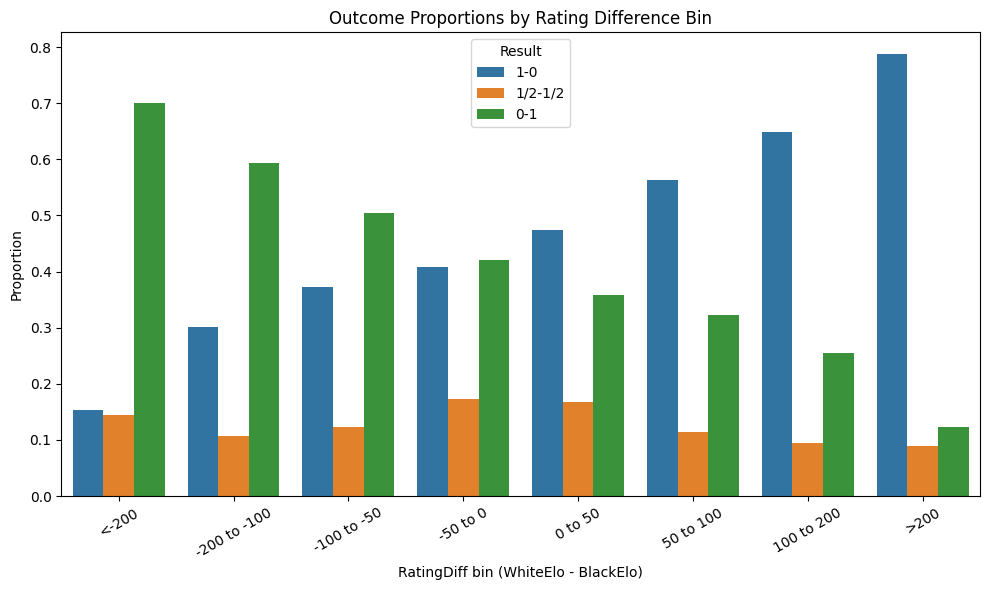

In [16]:
plt.figure(figsize=(10,6))
sns.barplot(data=gap_outcome, x='RatingGapBin', y='prop', hue='Result',
            hue_order=['1-0','1/2-1/2','0-1'])
plt.title("Outcome Proportions by Rating Difference Bin")
plt.xlabel("RatingDiff bin (WhiteElo - BlackElo)")
plt.ylabel("Proportion")
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

### 4. Inferential Statistics
#### 4.1 Chi-square test: Rating Gap vs Result

In [17]:
# Contingency table: RatingGapBin and Result
ct = pd.crosstab(df['RatingGapBin'], df['Result'])
ct

Result,0-1,1-0,1/2-1/2
RatingGapBin,,,
<-200,82406,18082,17051
-200 to -100,345117,174759,61903
-100 to -50,207205,153411,50738
-50 to 0,222752,216142,91552
0 to 50,188746,249008,88305
50 to 100,131177,229119,46767
100 to 200,146760,373295,54601
>200,14778,94289,10735


In [18]:
chi2, p_chi, dof, expected = stats.chi2_contingency(ct)

print("Chi-square test of independence: RatingGapBin vs Result")
print(f"Chi-square statistic: {chi2:.3f}")
print(f"Degrees of freedom: {dof}")
print(f"P-value: {p_chi:.3e}")

Chi-square test of independence: RatingGapBin vs Result
Chi-square statistic: 321350.588
Degrees of freedom: 14
P-value: 0.000e+00


#### 4.2 One-Way ANOVA: Game Length vs Result

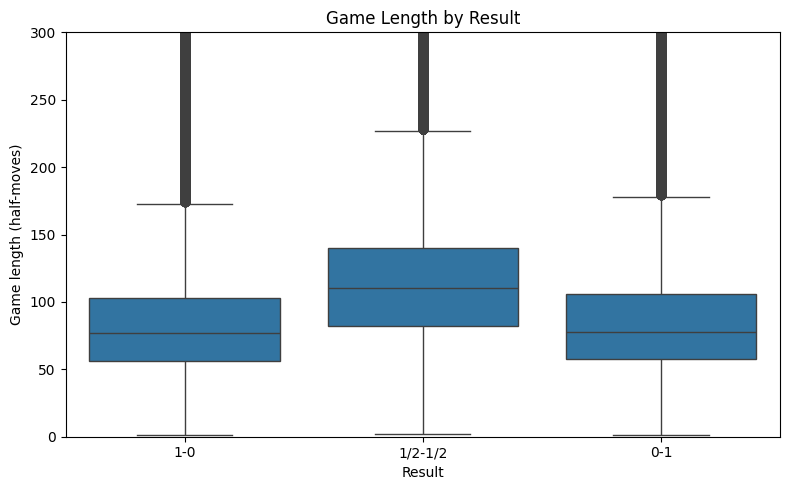

In [19]:
white_len = df[df['Result'] == '1-0']['GameLength'].dropna()
draw_len  = df[df['Result'] == '1/2-1/2']['GameLength'].dropna()
black_len = df[df['Result'] == '0-1']['GameLength'].dropna()

plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='Result', y='GameLength', order=['1-0','1/2-1/2','0-1'])
plt.xlabel("Result")
plt.ylabel("Game length (half-moves)")
plt.title("Game Length by Result")
plt.ylim(0, 300)  # Focus on main range
plt.tight_layout()
plt.show()

In [20]:
f_stat, p_anova = stats.f_oneway(white_len, draw_len, black_len)
print(f"ANOVA F-statistic: {f_stat:.3f}")
print(f"P-value: {p_anova:.3e}")

ANOVA F-statistic: 149527.237
P-value: 0.000e+00
